# GAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Concate sketch and real images

In [ ]:
import os
os.mkdir('/content/dataset')

In [ ]:
import os
import shutil

# Update this to the main folder path
main_folder = "/content/drive/MyDrive/CUHK/"
sketch_folder = os.path.join(main_folder, "Training sketch")
real_folder = os.path.join(main_folder, "Training photo")

# List and sort image files
sketch_files = sorted(os.listdir(sketch_folder))
real_files = sorted(os.listdir(real_folder))

# Safety check
if len(sketch_files) != len(real_files):
    print("Mismatch in the number of images between sketches and real folders.")
else:
    for sketch_file, real_file in zip(sketch_files, real_files):
        sketch_path = os.path.join(sketch_folder, sketch_file)
        new_sketch_path = os.path.join(sketch_folder, real_file)
        os.rename(sketch_path, new_sketch_path)
    print("✅ Sketch filenames successfully renamed to match real image filenames.")


✅ Sketch filenames successfully renamed to match real image filenames.


In [ ]:
# !zip -r dataset.zip /content/dataset/


In [ ]:
import cv2
import os
import glob
import numpy as np

# Paths to sketch and real image folders
sketch_folder = "/content/drive/MyDrive/CUHK/Training sketch"
real_folder = "/content/drive/MyDrive/CUHK/Training photo"
output_folder = "/content/dataset"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get all sketch images
sketch_images = sorted(glob.glob(os.path.join(sketch_folder, "*.jpg")))  # Change extension if needed

# Process each sketch
for sketch_path in sketch_images:
    filename = os.path.basename(sketch_path)  # Extract filename
    real_path = os.path.join(real_folder, filename)  # Find corresponding real image

    if not os.path.exists(real_path):
        print(f"⚠️ No matching real image for {filename}, skipping...")
        continue

    # Load images
    sketch = cv2.imread(sketch_path, cv2.IMREAD_COLOR)
    real = cv2.imread(real_path, cv2.IMREAD_COLOR)

    # Check if images loaded successfully
    if sketch is None:
        print(f"⚠️ Failed to load sketch image: {sketch_path}, skipping...")
        continue
    if real is None:
        print(f"⚠️ Failed to load real image: {real_path}, skipping...")
        continue

    # Load images
    sketch = cv2.imread(sketch_path, cv2.IMREAD_COLOR)
    real = cv2.imread(real_path, cv2.IMREAD_COLOR)

    # Resize to the same size (Ensure both are 256x256 or the required size)
    sketch = cv2.resize(sketch, (256, 256))
    real = cv2.resize(real, (256, 256))

    # Combine side-by-side (Left: Sketch, Right: Real Image)
    combined = np.hstack((sketch, real))

    # Save merged image
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, combined)
    # print(f"✅ Saved paired image: {output_path}")

print("🎯 All images xprocessed and saved in 'train' folder!")


🎯 All images xprocessed and saved in 'train' folder!


# MODEL

In [ ]:
!pip install torch torchvision
# !pip uninstall tensorflow
# !pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# from torchvision import transforms
# from torch.utils.data import DataLoader
# from models import Pix2Pix  # Assuming Pix2Pix implementation is available

# # Load Dataset
# dataset = '/content/drive/MyDrive/CUHK_Mixed/dataset'
# dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# # Initialize Model
# model = Pix2Pix()

# # Train
# for epoch in range(epochs):
#     for sketch, real_image in dataloader:
#         model.train_step(sketch, real_image)

# # Save Model
# torch.save(model.state_dict(), "pix2pix_sketch2image.pth")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import glob

Load Dataset


In [ ]:
# ======================
# 1️⃣ Load Dataset
# ======================
IMG_SIZE = 256

def load_images(folder, img_size=IMG_SIZE):
    image_paths = sorted(glob.glob(os.path.join(folder, "*.jpg")))
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_size * 2, img_size))  # (Sketch | Real)
        images.append(img / 127.5 - 1)  # Normalize [-1, 1]
    return np.array(images)

DATASET_PATH = "/content/drive/MyDrive/dataset"
images = load_images(DATASET_PATH)
sketches = np.array([img[:, :IMG_SIZE, :] for img in images])
real_images = np.array([img[:, IMG_SIZE:, :] for img in images])

# sketches = sketches.astype('float32')
# real_images = real_images.astype('float32')

# sketches = (sketches / 127.5) - 1.0
# real_images = (real_images / 127.5) - 1.0


U-Net Generator

In [ ]:
# ======================
# 2️⃣ U-Net Generator
# ======================
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential([
        Conv2D(filters, size, strides=2, padding='same',
               kernel_initializer=initializer, use_bias=False),
        BatchNormalization() if apply_batchnorm else tf.keras.layers.Lambda(lambda x: x),
        LeakyReLU()
    ])
    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    layers = [
        Conv2DTranspose(filters, size, strides=2, padding='same',
                        kernel_initializer=initializer, use_bias=False),
        BatchNormalization()
    ]
    if apply_dropout:
        layers.append(Dropout(0.5))
    layers.append(ReLU())
    return tf.keras.Sequential(layers)

def build_generator():
    inputs = Input(shape=[IMG_SIZE, IMG_SIZE, 3])
    down = [downsample(f, 4, i > 0) for i, f in enumerate([64, 128, 256, 512, 512, 512, 512, 512])]
    up = [upsample(f, 4, i < 3) for i, f in enumerate([512, 512, 512, 512, 256, 128, 64])]

    x = inputs
    skips = []
    for d in down:
        x = d(x)
        skips.append(x)
    skips = reversed(skips[:-1])

    for u, skip in zip(up, skips):
        x = u(x)
        x = Concatenate()([x, skip])

    outputs = Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(x)
    return Model(inputs, outputs)

generator = build_generator()

PatchGAN Discriminator

In [ ]:
# ==========================
# 3️⃣ PatchGAN Discriminator
# ==========================
def build_discriminator():
    sketch = Input(shape=[IMG_SIZE, IMG_SIZE, 3])
    real = Input(shape=[IMG_SIZE, IMG_SIZE, 3])
    combined = Concatenate()([sketch, real])
    down = [downsample(f, 4, i > 0) for i, f in enumerate([64, 128, 256, 512])]
    x = combined
    for d in down:
        x = d(x)
    x = Conv2D(1, 4, strides=1, padding='same')(x)
    return Model([sketch, real], x)

discriminator = build_discriminator()

Loss Functions and Optimizer

In [ ]:
# ================================
# 4️⃣ Loss Functions and Optimizer
# ================================
vgg = tf.keras.applications.VGG19(include_top=False, weights="imagenet")
feature_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer("block3_conv3").output)  # Extract deeper features

def perceptual_loss(real, fake):
    real_features = feature_extractor(tf.image.resize(real, (224, 224))) # was 224 * 224
    fake_features = feature_extractor(tf.image.resize(fake, (224, 224)))
    return tf.reduce_mean(tf.abs(real_features - fake_features))

def color_consistency_loss(real, fake):
    return tf.reduce_mean(tf.abs(tf.image.rgb_to_yuv(real) - tf.image.rgb_to_yuv(fake)))  # Preserve color consistency

loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# def generator_loss(disc_generated_output, gen_output, target):
#     adv_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
#     l1 = tf.reduce_mean(tf.abs(target - gen_output))
#     perceptual = perceptual_loss(target, gen_output)
#     color_loss = color_consistency_loss(target, gen_output)
#     total = adv_loss + (100 * l1) + (10 * perceptual) + (5 * color_loss)  # Add color loss
#     return total

def generator_loss(disc_generated_output, gen_output, target):
    adv_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    # Cast target to float32 to match gen_output's dtype
    l1 = tf.reduce_mean(tf.abs(tf.cast(target, tf.float32) - gen_output))
    perceptual = perceptual_loss(target, gen_output)
    total = adv_loss + (100 * l1) + (10 * perceptual)
    return total

# ... (rest of your code)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    fake_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    return real_loss + fake_loss

gen_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Early Stopping

In [ ]:
# Early stopping setup
patience = 10
min_delta = 0.001
best_loss = float('inf')
wait = 0

# Directory to save the best model
CHECKPOINT_PATH = "best_generator.h5"


Training

In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("✅ GPU is available!")
else:
    print("⚠️ No GPU detected. Training on CPU will be slower.")

✅ GPU is available!


In [ ]:
print(sketches.shape, sketches.dtype)
print(real_images.shape, real_images.dtype)


(171, 256, 256, 3) float64
(171, 256, 256, 3) float64


Epoch 1/150 | Gen Loss: 55.9100 | Disc Loss: 0.5165 | Avg Gen Loss: 68.8963 | Avg Disc Loss: 0.9553
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 2/150 | Gen Loss: 46.7849 | Disc Loss: 0.5334 | Avg Gen Loss: 49.4509 | Avg Disc Loss: 0.5540
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 3/150 | Gen Loss: 37.4151 | Disc Loss: 0.8457 | Avg Gen Loss: 41.2444 | Avg Disc Loss: 0.7056
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 4/150 | Gen Loss: 37.4499 | Disc Loss: 0.4580 | Avg Gen Loss: 38.2572 | Avg Disc Loss: 0.6833
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 5/150 | Gen Loss: 36.5535 | Disc Loss: 0.5217 | Avg Gen Loss: 37.0491 | Avg Disc Loss: 0.7469
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 6/150 | Gen Loss: 34.1508 | Disc Loss: 0.5082 | Avg Gen Loss: 36.6269 | Avg Disc Loss: 0.6734
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 7/150 | Gen Loss: 36.7057 | Disc Loss: 0.5249 | Avg Gen Loss: 36.6614 | Avg Disc Loss: 0.5888
⏳ No improvement in gen loss. Wait: 1/10


Epoch 8/150 | Gen Loss: 50.7646 | Disc Loss: 1.5191 | Avg Gen Loss: 36.1705 | Avg Disc Loss: 0.8028
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 9/150 | Gen Loss: 41.8430 | Disc Loss: 0.5440 | Avg Gen Loss: 35.6706 | Avg Disc Loss: 0.6371
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 10/150 | Gen Loss: 30.6104 | Disc Loss: 0.7430 | Avg Gen Loss: 34.6981 | Avg Disc Loss: 0.9280


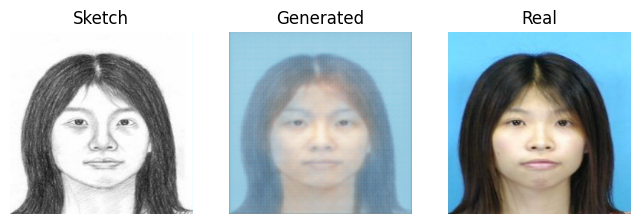

✅ Gen loss improved. Model saved to best_generator.h5


Epoch 11/150 | Gen Loss: 47.0696 | Disc Loss: 0.1631 | Avg Gen Loss: 34.2637 | Avg Disc Loss: 0.8172
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 12/150 | Gen Loss: 31.6572 | Disc Loss: 0.6131 | Avg Gen Loss: 33.4473 | Avg Disc Loss: 0.8586
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 13/150 | Gen Loss: 36.2122 | Disc Loss: 0.5428 | Avg Gen Loss: 33.3999 | Avg Disc Loss: 0.7789
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 14/150 | Gen Loss: 31.2831 | Disc Loss: 1.0369 | Avg Gen Loss: 32.4275 | Avg Disc Loss: 0.8249
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 15/150 | Gen Loss: 32.2300 | Disc Loss: 0.6002 | Avg Gen Loss: 31.8980 | Avg Disc Loss: 0.7727
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 16/150 | Gen Loss: 33.4340 | Disc Loss: 0.7922 | Avg Gen Loss: 31.3060 | Avg Disc Loss: 0.8498
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 17/150 | Gen Loss: 32.7810 | Disc Loss: 0.8094 | Avg Gen Loss: 31.0334 | Avg Disc Loss: 0.7626
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 18/150 | Gen Loss: 31.3021 | Disc Loss: 0.4649 | Avg Gen Loss: 30.5952 | Avg Disc Loss: 0.9104
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 19/150 | Gen Loss: 28.8653 | Disc Loss: 0.7961 | Avg Gen Loss: 29.9666 | Avg Disc Loss: 0.7790
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 20/150 | Gen Loss: 31.8540 | Disc Loss: 1.5458 | Avg Gen Loss: 29.1899 | Avg Disc Loss: 0.9287


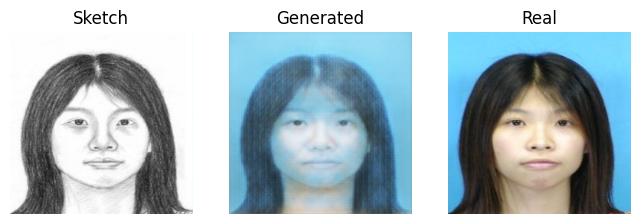

✅ Gen loss improved. Model saved to best_generator.h5


Epoch 21/150 | Gen Loss: 28.0793 | Disc Loss: 0.9339 | Avg Gen Loss: 28.6683 | Avg Disc Loss: 0.8149
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 22/150 | Gen Loss: 27.3517 | Disc Loss: 0.7662 | Avg Gen Loss: 27.9611 | Avg Disc Loss: 1.0066
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 23/150 | Gen Loss: 29.8320 | Disc Loss: 1.3112 | Avg Gen Loss: 27.9550 | Avg Disc Loss: 0.9106
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 24/150 | Gen Loss: 26.4855 | Disc Loss: 0.4604 | Avg Gen Loss: 27.4171 | Avg Disc Loss: 0.8758
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 25/150 | Gen Loss: 26.6260 | Disc Loss: 0.5210 | Avg Gen Loss: 27.1041 | Avg Disc Loss: 0.9182
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 26/150 | Gen Loss: 29.0736 | Disc Loss: 0.8305 | Avg Gen Loss: 26.4294 | Avg Disc Loss: 0.8085
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 27/150 | Gen Loss: 25.7270 | Disc Loss: 0.9303 | Avg Gen Loss: 26.4103 | Avg Disc Loss: 0.8960
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 28/150 | Gen Loss: 31.6283 | Disc Loss: 0.9436 | Avg Gen Loss: 25.9548 | Avg Disc Loss: 1.0379
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 29/150 | Gen Loss: 24.1127 | Disc Loss: 0.6310 | Avg Gen Loss: 25.4752 | Avg Disc Loss: 0.9230
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 30/150 | Gen Loss: 23.7984 | Disc Loss: 0.5892 | Avg Gen Loss: 25.0296 | Avg Disc Loss: 0.7624


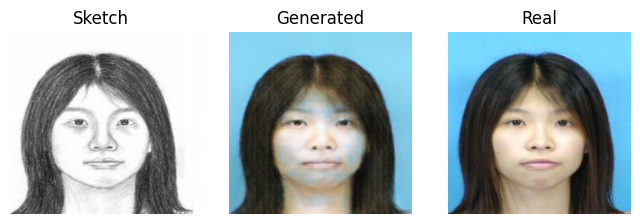

✅ Gen loss improved. Model saved to best_generator.h5


Epoch 31/150 | Gen Loss: 27.0207 | Disc Loss: 1.1877 | Avg Gen Loss: 24.2482 | Avg Disc Loss: 1.1199
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 32/150 | Gen Loss: 38.8099 | Disc Loss: 1.5164 | Avg Gen Loss: 24.4365 | Avg Disc Loss: 0.7972
⏳ No improvement in gen loss. Wait: 1/10


Epoch 33/150 | Gen Loss: 24.3100 | Disc Loss: 0.7430 | Avg Gen Loss: 23.4941 | Avg Disc Loss: 1.0418
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 34/150 | Gen Loss: 26.2080 | Disc Loss: 0.6135 | Avg Gen Loss: 23.2329 | Avg Disc Loss: 0.8302
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 35/150 | Gen Loss: 26.6762 | Disc Loss: 0.5837 | Avg Gen Loss: 23.6233 | Avg Disc Loss: 0.9279
⏳ No improvement in gen loss. Wait: 1/10
Epoch 36/150 | Gen Loss: 23.0037 | Disc Loss: 1.0362 | Avg Gen Loss: 23.4291 | Avg Disc Loss: 0.9936
⏳ No improvement in gen loss. Wait: 2/10


Epoch 37/150 | Gen Loss: 22.4918 | Disc Loss: 1.0123 | Avg Gen Loss: 22.4235 | Avg Disc Loss: 0.7863
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 38/150 | Gen Loss: 22.2114 | Disc Loss: 0.9521 | Avg Gen Loss: 21.9046 | Avg Disc Loss: 0.9472
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 39/150 | Gen Loss: 23.1631 | Disc Loss: 0.7781 | Avg Gen Loss: 21.8047 | Avg Disc Loss: 1.1690
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 40/150 | Gen Loss: 22.6042 | Disc Loss: 0.9500 | Avg Gen Loss: 21.9414 | Avg Disc Loss: 0.8253


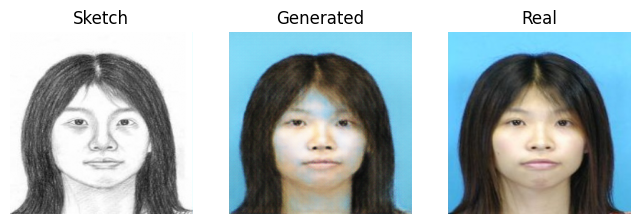

⏳ No improvement in gen loss. Wait: 1/10


Epoch 41/150 | Gen Loss: 22.0943 | Disc Loss: 0.8479 | Avg Gen Loss: 21.5326 | Avg Disc Loss: 0.9260
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 42/150 | Gen Loss: 21.1041 | Disc Loss: 0.7891 | Avg Gen Loss: 21.2335 | Avg Disc Loss: 0.8133
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 43/150 | Gen Loss: 22.1334 | Disc Loss: 1.9639 | Avg Gen Loss: 21.5916 | Avg Disc Loss: 0.9998
⏳ No improvement in gen loss. Wait: 1/10


Epoch 44/150 | Gen Loss: 19.5789 | Disc Loss: 0.9873 | Avg Gen Loss: 20.4988 | Avg Disc Loss: 1.0889
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 45/150 | Gen Loss: 19.9633 | Disc Loss: 0.8671 | Avg Gen Loss: 20.0957 | Avg Disc Loss: 1.1345
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 46/150 | Gen Loss: 20.5914 | Disc Loss: 1.2641 | Avg Gen Loss: 20.2156 | Avg Disc Loss: 0.8639
⏳ No improvement in gen loss. Wait: 1/10
Epoch 47/150 | Gen Loss: 19.8327 | Disc Loss: 1.2429 | Avg Gen Loss: 20.3442 | Avg Disc Loss: 0.9412
⏳ No improvement in gen loss. Wait: 2/10


Epoch 48/150 | Gen Loss: 20.4833 | Disc Loss: 0.8371 | Avg Gen Loss: 19.6357 | Avg Disc Loss: 0.9836
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 49/150 | Gen Loss: 18.3318 | Disc Loss: 1.1091 | Avg Gen Loss: 19.6584 | Avg Disc Loss: 1.0371
⏳ No improvement in gen loss. Wait: 1/10
Epoch 50/150 | Gen Loss: 25.5615 | Disc Loss: 1.0989 | Avg Gen Loss: 19.9582 | Avg Disc Loss: 0.9273


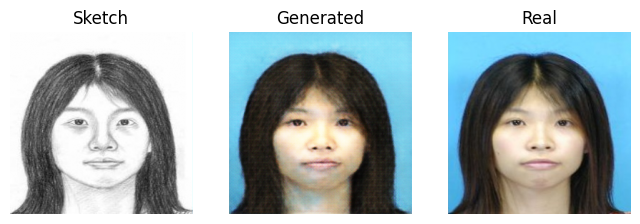

⏳ No improvement in gen loss. Wait: 2/10
Epoch 51/150 | Gen Loss: 24.8044 | Disc Loss: 0.8713 | Avg Gen Loss: 20.3825 | Avg Disc Loss: 1.0291
⏳ No improvement in gen loss. Wait: 3/10


Epoch 52/150 | Gen Loss: 18.9611 | Disc Loss: 1.2093 | Avg Gen Loss: 19.1330 | Avg Disc Loss: 0.9306
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 53/150 | Gen Loss: 17.4139 | Disc Loss: 1.0062 | Avg Gen Loss: 19.1461 | Avg Disc Loss: 1.0896
⏳ No improvement in gen loss. Wait: 1/10
Epoch 54/150 | Gen Loss: 18.5224 | Disc Loss: 0.7651 | Avg Gen Loss: 19.1599 | Avg Disc Loss: 0.9201
⏳ No improvement in gen loss. Wait: 2/10


Epoch 55/150 | Gen Loss: 18.1318 | Disc Loss: 0.9273 | Avg Gen Loss: 18.3474 | Avg Disc Loss: 1.5074
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 56/150 | Gen Loss: 18.8662 | Disc Loss: 0.6995 | Avg Gen Loss: 18.0495 | Avg Disc Loss: 0.8922
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 57/150 | Gen Loss: 23.3657 | Disc Loss: 1.2046 | Avg Gen Loss: 18.5215 | Avg Disc Loss: 0.9754
⏳ No improvement in gen loss. Wait: 1/10


Epoch 58/150 | Gen Loss: 18.4958 | Disc Loss: 1.0319 | Avg Gen Loss: 18.0136 | Avg Disc Loss: 1.1808
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 59/150 | Gen Loss: 17.8221 | Disc Loss: 0.8744 | Avg Gen Loss: 17.3793 | Avg Disc Loss: 0.9057
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 60/150 | Gen Loss: 20.6713 | Disc Loss: 0.9036 | Avg Gen Loss: 17.8932 | Avg Disc Loss: 0.9533


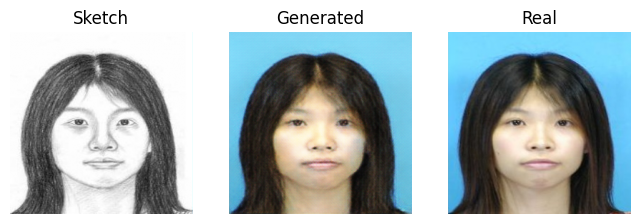

⏳ No improvement in gen loss. Wait: 1/10
Epoch 61/150 | Gen Loss: 17.1820 | Disc Loss: 0.6414 | Avg Gen Loss: 17.6813 | Avg Disc Loss: 1.0655
⏳ No improvement in gen loss. Wait: 2/10
Epoch 62/150 | Gen Loss: 19.7245 | Disc Loss: 1.0551 | Avg Gen Loss: 17.4563 | Avg Disc Loss: 0.9922
⏳ No improvement in gen loss. Wait: 3/10
Epoch 63/150 | Gen Loss: 22.1166 | Disc Loss: 1.4528 | Avg Gen Loss: 17.5824 | Avg Disc Loss: 1.0801
⏳ No improvement in gen loss. Wait: 4/10


Epoch 64/150 | Gen Loss: 20.8207 | Disc Loss: 0.9042 | Avg Gen Loss: 16.8364 | Avg Disc Loss: 1.0102
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 65/150 | Gen Loss: 23.5124 | Disc Loss: 1.0670 | Avg Gen Loss: 17.1546 | Avg Disc Loss: 1.1119
⏳ No improvement in gen loss. Wait: 1/10


Epoch 66/150 | Gen Loss: 23.2420 | Disc Loss: 0.9553 | Avg Gen Loss: 16.8191 | Avg Disc Loss: 0.9739
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 67/150 | Gen Loss: 17.5180 | Disc Loss: 1.3436 | Avg Gen Loss: 17.1052 | Avg Disc Loss: 1.0599
⏳ No improvement in gen loss. Wait: 1/10


Epoch 68/150 | Gen Loss: 16.2641 | Disc Loss: 1.0137 | Avg Gen Loss: 16.7570 | Avg Disc Loss: 1.2435
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 69/150 | Gen Loss: 20.1909 | Disc Loss: 1.0395 | Avg Gen Loss: 16.1428 | Avg Disc Loss: 0.9714
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 70/150 | Gen Loss: 16.8899 | Disc Loss: 0.8610 | Avg Gen Loss: 16.2568 | Avg Disc Loss: 0.9693


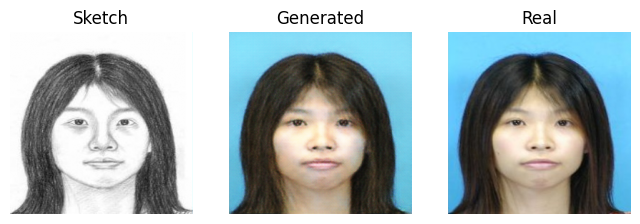

⏳ No improvement in gen loss. Wait: 1/10
Epoch 71/150 | Gen Loss: 16.7622 | Disc Loss: 1.3010 | Avg Gen Loss: 16.1672 | Avg Disc Loss: 2.2063
⏳ No improvement in gen loss. Wait: 2/10


Epoch 72/150 | Gen Loss: 15.7866 | Disc Loss: 0.9483 | Avg Gen Loss: 15.4230 | Avg Disc Loss: 1.1348
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 73/150 | Gen Loss: 17.5124 | Disc Loss: 0.8394 | Avg Gen Loss: 15.2515 | Avg Disc Loss: 0.9391
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 74/150 | Gen Loss: 17.6696 | Disc Loss: 0.8335 | Avg Gen Loss: 15.4024 | Avg Disc Loss: 0.9909
⏳ No improvement in gen loss. Wait: 1/10
Epoch 75/150 | Gen Loss: 15.8320 | Disc Loss: 1.0486 | Avg Gen Loss: 15.9431 | Avg Disc Loss: 0.9698
⏳ No improvement in gen loss. Wait: 2/10
Epoch 76/150 | Gen Loss: 16.5363 | Disc Loss: 0.9895 | Avg Gen Loss: 15.2971 | Avg Disc Loss: 1.0487
⏳ No improvement in gen loss. Wait: 3/10


Epoch 77/150 | Gen Loss: 13.3232 | Disc Loss: 1.1934 | Avg Gen Loss: 15.2470 | Avg Disc Loss: 1.0351
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 78/150 | Gen Loss: 15.0704 | Disc Loss: 0.8222 | Avg Gen Loss: 14.9786 | Avg Disc Loss: 1.0741
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 79/150 | Gen Loss: 15.2901 | Disc Loss: 1.2873 | Avg Gen Loss: 15.4535 | Avg Disc Loss: 1.2123
⏳ No improvement in gen loss. Wait: 1/10
Epoch 80/150 | Gen Loss: 16.5071 | Disc Loss: 1.1683 | Avg Gen Loss: 14.6682 | Avg Disc Loss: 1.0490


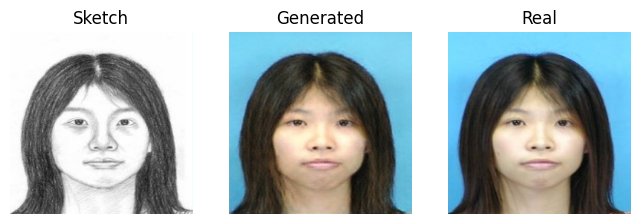

✅ Gen loss improved. Model saved to best_generator.h5
Epoch 81/150 | Gen Loss: 15.5281 | Disc Loss: 0.7685 | Avg Gen Loss: 15.5621 | Avg Disc Loss: 0.9817
⏳ No improvement in gen loss. Wait: 1/10
Epoch 82/150 | Gen Loss: 17.0841 | Disc Loss: 0.9184 | Avg Gen Loss: 14.7252 | Avg Disc Loss: 1.0049
⏳ No improvement in gen loss. Wait: 2/10
Epoch 83/150 | Gen Loss: 19.7916 | Disc Loss: 0.9012 | Avg Gen Loss: 15.0372 | Avg Disc Loss: 1.2056
⏳ No improvement in gen loss. Wait: 3/10
Epoch 84/150 | Gen Loss: 20.2686 | Disc Loss: 1.3079 | Avg Gen Loss: 15.2181 | Avg Disc Loss: 1.1743
⏳ No improvement in gen loss. Wait: 4/10


Epoch 85/150 | Gen Loss: 14.6362 | Disc Loss: 1.3226 | Avg Gen Loss: 14.4557 | Avg Disc Loss: 1.0058
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 86/150 | Gen Loss: 15.5863 | Disc Loss: 1.1639 | Avg Gen Loss: 14.8989 | Avg Disc Loss: 0.9775
⏳ No improvement in gen loss. Wait: 1/10


Epoch 87/150 | Gen Loss: 14.3514 | Disc Loss: 0.8879 | Avg Gen Loss: 14.3271 | Avg Disc Loss: 1.0008
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 88/150 | Gen Loss: 12.6304 | Disc Loss: 1.1934 | Avg Gen Loss: 14.2102 | Avg Disc Loss: 1.8503
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 89/150 | Gen Loss: 13.0167 | Disc Loss: 1.2775 | Avg Gen Loss: 14.1644 | Avg Disc Loss: 1.0328
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 90/150 | Gen Loss: 14.1016 | Disc Loss: 1.1531 | Avg Gen Loss: 13.8666 | Avg Disc Loss: 1.0353


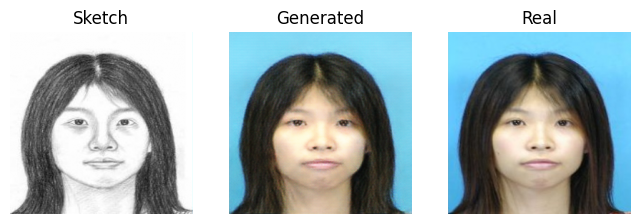

✅ Gen loss improved. Model saved to best_generator.h5


Epoch 91/150 | Gen Loss: 13.9377 | Disc Loss: 1.0315 | Avg Gen Loss: 13.8275 | Avg Disc Loss: 0.9658
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 92/150 | Gen Loss: 14.5720 | Disc Loss: 1.2390 | Avg Gen Loss: 14.1244 | Avg Disc Loss: 1.0663
⏳ No improvement in gen loss. Wait: 1/10


Epoch 93/150 | Gen Loss: 15.0088 | Disc Loss: 0.8833 | Avg Gen Loss: 13.7462 | Avg Disc Loss: 0.9926
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 94/150 | Gen Loss: 16.3751 | Disc Loss: 0.8733 | Avg Gen Loss: 14.3444 | Avg Disc Loss: 1.0303
⏳ No improvement in gen loss. Wait: 1/10
Epoch 95/150 | Gen Loss: 14.1517 | Disc Loss: 0.9951 | Avg Gen Loss: 13.8295 | Avg Disc Loss: 1.0592
⏳ No improvement in gen loss. Wait: 2/10


Epoch 96/150 | Gen Loss: 14.2578 | Disc Loss: 0.8726 | Avg Gen Loss: 13.3695 | Avg Disc Loss: 1.0935
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 97/150 | Gen Loss: 18.0222 | Disc Loss: 1.0974 | Avg Gen Loss: 13.8124 | Avg Disc Loss: 1.0568
⏳ No improvement in gen loss. Wait: 1/10
Epoch 98/150 | Gen Loss: 16.7172 | Disc Loss: 1.0090 | Avg Gen Loss: 13.9602 | Avg Disc Loss: 1.0388
⏳ No improvement in gen loss. Wait: 2/10
Epoch 99/150 | Gen Loss: 15.0896 | Disc Loss: 1.1136 | Avg Gen Loss: 13.3812 | Avg Disc Loss: 1.0089
⏳ No improvement in gen loss. Wait: 3/10
Epoch 100/150 | Gen Loss: 13.5932 | Disc Loss: 0.9410 | Avg Gen Loss: 13.1225 | Avg Disc Loss: 1.0597


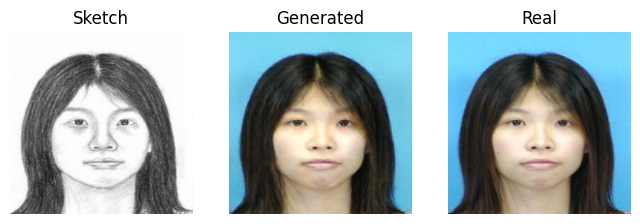

✅ Gen loss improved. Model saved to best_generator.h5
Epoch 101/150 | Gen Loss: 17.5908 | Disc Loss: 1.2111 | Avg Gen Loss: 13.4683 | Avg Disc Loss: 1.0867
⏳ No improvement in gen loss. Wait: 1/10


Epoch 102/150 | Gen Loss: 13.5327 | Disc Loss: 0.9579 | Avg Gen Loss: 13.0895 | Avg Disc Loss: 1.0685
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 103/150 | Gen Loss: 12.6018 | Disc Loss: 1.8533 | Avg Gen Loss: 13.1905 | Avg Disc Loss: 1.1270
⏳ No improvement in gen loss. Wait: 1/10
Epoch 104/150 | Gen Loss: 14.2727 | Disc Loss: 1.3312 | Avg Gen Loss: 13.2415 | Avg Disc Loss: 1.2771
⏳ No improvement in gen loss. Wait: 2/10


Epoch 105/150 | Gen Loss: 12.5636 | Disc Loss: 1.0814 | Avg Gen Loss: 12.6031 | Avg Disc Loss: 1.0170
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 106/150 | Gen Loss: 12.5227 | Disc Loss: 0.8987 | Avg Gen Loss: 12.9485 | Avg Disc Loss: 1.0617
⏳ No improvement in gen loss. Wait: 1/10


Epoch 107/150 | Gen Loss: 12.8493 | Disc Loss: 0.7141 | Avg Gen Loss: 12.4823 | Avg Disc Loss: 1.0428
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 108/150 | Gen Loss: 14.4886 | Disc Loss: 0.7961 | Avg Gen Loss: 12.9099 | Avg Disc Loss: 1.1303
⏳ No improvement in gen loss. Wait: 1/10
Epoch 109/150 | Gen Loss: 12.1128 | Disc Loss: 0.9628 | Avg Gen Loss: 12.6007 | Avg Disc Loss: 1.1176
⏳ No improvement in gen loss. Wait: 2/10
Epoch 110/150 | Gen Loss: 13.7109 | Disc Loss: 0.9298 | Avg Gen Loss: 13.0797 | Avg Disc Loss: 1.0393


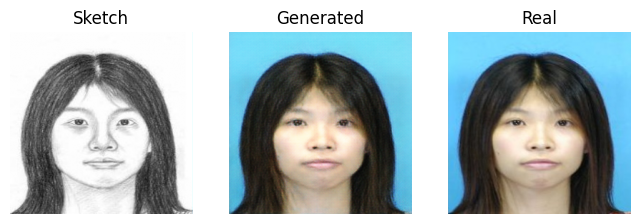

⏳ No improvement in gen loss. Wait: 3/10
Epoch 111/150 | Gen Loss: 22.8125 | Disc Loss: 1.5901 | Avg Gen Loss: 13.1480 | Avg Disc Loss: 1.1226
⏳ No improvement in gen loss. Wait: 4/10
Epoch 112/150 | Gen Loss: 11.8798 | Disc Loss: 1.1969 | Avg Gen Loss: 12.6705 | Avg Disc Loss: 1.1414
⏳ No improvement in gen loss. Wait: 5/10


Epoch 113/150 | Gen Loss: 12.5112 | Disc Loss: 1.1942 | Avg Gen Loss: 12.4542 | Avg Disc Loss: 1.1237
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 114/150 | Gen Loss: 11.6123 | Disc Loss: 0.8321 | Avg Gen Loss: 12.3410 | Avg Disc Loss: 1.0084
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 115/150 | Gen Loss: 12.1078 | Disc Loss: 1.2243 | Avg Gen Loss: 12.4791 | Avg Disc Loss: 1.0265
⏳ No improvement in gen loss. Wait: 1/10
Epoch 116/150 | Gen Loss: 13.6414 | Disc Loss: 0.9086 | Avg Gen Loss: 12.3679 | Avg Disc Loss: 1.0865
⏳ No improvement in gen loss. Wait: 2/10
Epoch 117/150 | Gen Loss: 18.9476 | Disc Loss: 0.8252 | Avg Gen Loss: 12.4734 | Avg Disc Loss: 1.0461
⏳ No improvement in gen loss. Wait: 3/10
Epoch 118/150 | Gen Loss: 13.2502 | Disc Loss: 1.5610 | Avg Gen Loss: 12.4815 | Avg Disc Loss: 3.3983
⏳ No improvement in gen loss. Wait: 4/10


Epoch 119/150 | Gen Loss: 11.6209 | Disc Loss: 1.4106 | Avg Gen Loss: 11.3882 | Avg Disc Loss: 1.4588
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 120/150 | Gen Loss: 14.4863 | Disc Loss: 1.4712 | Avg Gen Loss: 11.4862 | Avg Disc Loss: 1.4265


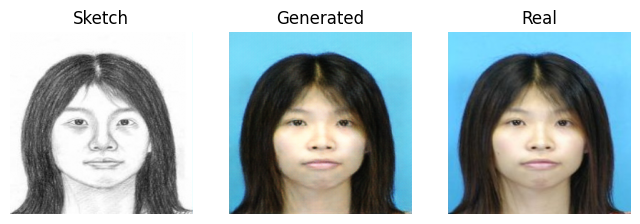

⏳ No improvement in gen loss. Wait: 1/10


Epoch 121/150 | Gen Loss: 13.7272 | Disc Loss: 1.4203 | Avg Gen Loss: 11.0739 | Avg Disc Loss: 1.4150
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 122/150 | Gen Loss: 12.3646 | Disc Loss: 1.3776 | Avg Gen Loss: 11.1341 | Avg Disc Loss: 1.3883
⏳ No improvement in gen loss. Wait: 1/10
Epoch 123/150 | Gen Loss: 11.8972 | Disc Loss: 1.4299 | Avg Gen Loss: 11.1613 | Avg Disc Loss: 1.3831
⏳ No improvement in gen loss. Wait: 2/10


Epoch 124/150 | Gen Loss: 11.5734 | Disc Loss: 1.3475 | Avg Gen Loss: 10.8301 | Avg Disc Loss: 1.3680
✅ Gen loss improved. Model saved to best_generator.h5


Epoch 125/150 | Gen Loss: 11.3764 | Disc Loss: 1.3484 | Avg Gen Loss: 10.7966 | Avg Disc Loss: 1.3531
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 126/150 | Gen Loss: 10.9536 | Disc Loss: 1.3615 | Avg Gen Loss: 10.9043 | Avg Disc Loss: 1.3487
⏳ No improvement in gen loss. Wait: 1/10


Epoch 127/150 | Gen Loss: 10.4252 | Disc Loss: 1.4806 | Avg Gen Loss: 10.6648 | Avg Disc Loss: 1.3744
✅ Gen loss improved. Model saved to best_generator.h5
Epoch 128/150 | Gen Loss: 11.1580 | Disc Loss: 1.3280 | Avg Gen Loss: 10.7936 | Avg Disc Loss: 1.2855
⏳ No improvement in gen loss. Wait: 1/10
Epoch 129/150 | Gen Loss: 11.4051 | Disc Loss: 1.1876 | Avg Gen Loss: 10.9083 | Avg Disc Loss: 1.2782
⏳ No improvement in gen loss. Wait: 2/10
Epoch 130/150 | Gen Loss: 10.4714 | Disc Loss: 1.4523 | Avg Gen Loss: 11.0276 | Avg Disc Loss: 1.3287


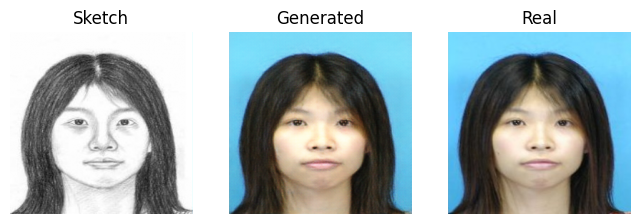

⏳ No improvement in gen loss. Wait: 3/10
Epoch 131/150 | Gen Loss: 10.8639 | Disc Loss: 1.1531 | Avg Gen Loss: 10.8324 | Avg Disc Loss: 1.2862
⏳ No improvement in gen loss. Wait: 4/10
Epoch 132/150 | Gen Loss: 13.1744 | Disc Loss: 1.0113 | Avg Gen Loss: 10.9446 | Avg Disc Loss: 1.2171
⏳ No improvement in gen loss. Wait: 5/10
Epoch 133/150 | Gen Loss: 11.7572 | Disc Loss: 1.1294 | Avg Gen Loss: 11.6784 | Avg Disc Loss: 1.4086
⏳ No improvement in gen loss. Wait: 6/10
Epoch 134/150 | Gen Loss: 10.9587 | Disc Loss: 1.1379 | Avg Gen Loss: 11.0149 | Avg Disc Loss: 1.5658
⏳ No improvement in gen loss. Wait: 7/10
Epoch 135/150 | Gen Loss: 15.0890 | Disc Loss: 1.2390 | Avg Gen Loss: 11.2797 | Avg Disc Loss: 1.1155
⏳ No improvement in gen loss. Wait: 8/10
Epoch 136/150 | Gen Loss: 13.1768 | Disc Loss: 1.0256 | Avg Gen Loss: 11.7575 | Avg Disc Loss: 1.1213
⏳ No improvement in gen loss. Wait: 9/10
Epoch 137/150 | Gen Loss: 12.5235 | Disc Loss: 1.1123 | Avg Gen Loss: 11.1978 | Avg Disc Loss: 1.1524

In [ ]:
# ======================
# 5️⃣ Training Loop
# ======================
EPOCHS = 150
BATCH_SIZE = 8
dataset = tf.data.Dataset.from_tensor_slices((sketches, real_images)).shuffle(1000).batch(BATCH_SIZE)

@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)
        disc_real = discriminator([input_image, target], training=True)
        disc_fake = discriminator([input_image, gen_output], training=True)
        gen_loss = generator_loss(disc_fake, gen_output, target)
        disc_loss = discriminator_loss(disc_real, disc_fake)

    gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gen_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_variables))
    return gen_loss, disc_loss

for epoch in range(EPOCHS):
    epoch_gen_loss = []
    epoch_disc_loss = []

    for sketch_batch, real_batch in dataset:
      g_loss, d_loss = train_step(sketch_batch, real_batch)
      epoch_gen_loss.append(g_loss.numpy())
      epoch_disc_loss.append(d_loss.numpy())

    avg_gen_loss = np.mean(epoch_gen_loss)
    avg_disc_loss = np.mean(epoch_disc_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} | Gen Loss: {g_loss:.4f} | Disc Loss: {d_loss:.4f} | Avg Gen Loss: {avg_gen_loss:.4f} | Avg Disc Loss: {avg_disc_loss:.4f}")

    # 🎨 Visualization every 10 epochs
    if (epoch + 1) % 10 == 0:
        pred = generator(tf.expand_dims(sketches[0], 0), training=False)[0].numpy()
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 3, 1)
        plt.title("Sketch")
        plt.imshow((sketches[0] + 1) / 2)
        plt.axis("off")
        plt.subplot(1, 3, 2)
        plt.title("Generated")
        plt.imshow((pred + 1) / 2)
        plt.axis("off")
        plt.subplot(1, 3, 3)
        plt.title("Real")
        plt.imshow((real_images[0] + 1) / 2)
        plt.axis("off")
        plt.show()

    # 💾 Save best model and check for early stopping
    if avg_gen_loss + min_delta < best_loss:
        best_loss = avg_gen_loss
        wait = 0
        generator.save(CHECKPOINT_PATH)
        print(f"✅ Gen loss improved. Model saved to {CHECKPOINT_PATH}")
    else:
        wait += 1
        print(f"⏳ No improvement in gen loss. Wait: {wait}/{patience}")
        if wait >= patience:
            print("🛑 Early stopping triggered.")
            break

print("🎯 Training Complete!")

Visualization

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualizeModel(generator, img_path):
  img = cv2.imread(img_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (256, 256))
  normalized_img = img_resized / 127.5 - 1  # Normalize to [-1, 1]
  input_tensor = tf.expand_dims(normalized_img, axis=0)

  # 3️⃣ Generate the output
  output = generator(input_tensor, training=False)[0].numpy()
  output = (output + 1) / 2  # Scale to [0, 1]

  # 4️⃣ Display both sketch and generated image
  plt.figure(figsize=(10, 5))

  # Left: Input Sketch
  plt.subplot(1, 2, 1)
  plt.imshow((normalized_img + 1) / 2)  # De-normalize to [0, 1]
  plt.title("Sketch (Input)")
  plt.axis("off")

  # Right: Generated Image
  plt.subplot(1, 2, 2)
  plt.imshow(output)
  plt.title("Generated Image")
  plt.axis("off")

  plt.tight_layout()
  plt.show()


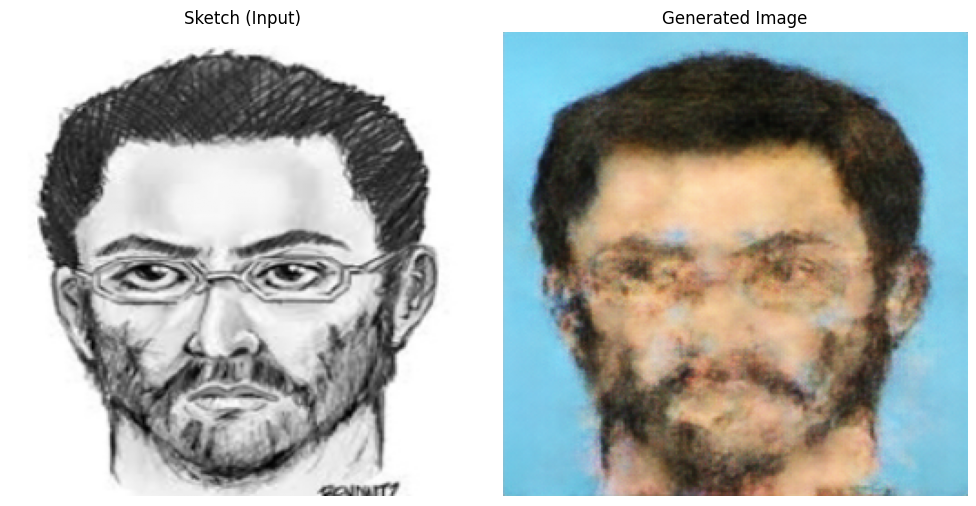

In [ ]:
# 1️⃣ Load the saved generator model
generator = tf.keras.models.load_model('/content/best_generator.h5', compile=False)

# 2️⃣ Load and preprocess the sketch image
img_path = '/content/s2.jpg'
visualizeModel(generator, img_path)

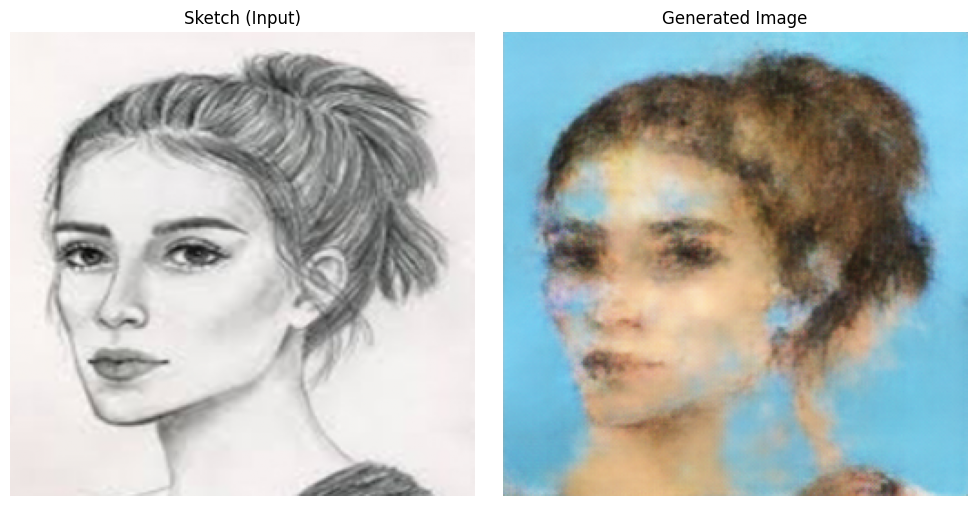

In [ ]:
# 2️⃣ Load and preprocess the sketch image
img_path = '/content/s3.jpg'
visualizeModel(generator, img_path)

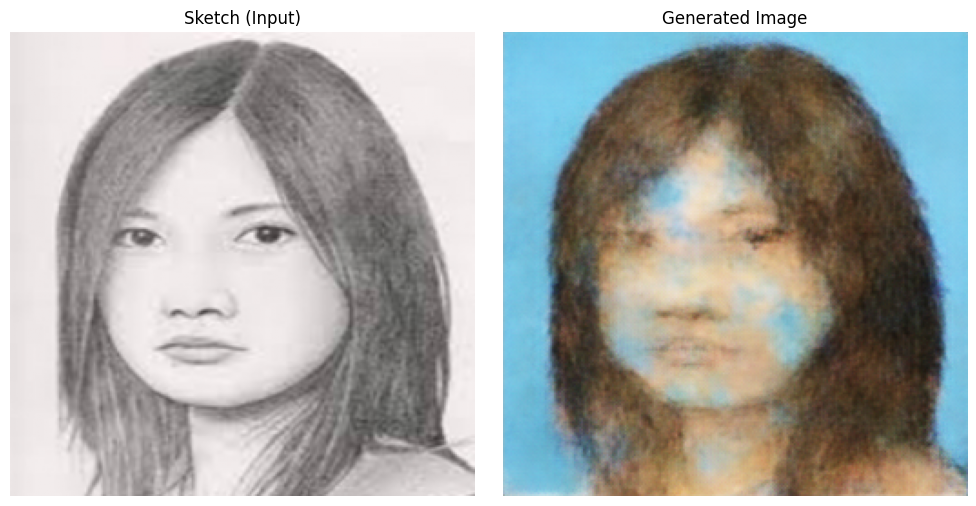

In [ ]:
# 2️⃣ Load and preprocess the sketch image
img_path = '/content/s5.jpg'
visualizeModel(generator, img_path)